In [1]:
import pandas as pd  
import numpy as np

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
sns.color_palette("Paired")
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (12, 8)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [2]:
IPL_data = pd.read_csv("IPL_match_data_2008-2022.csv")
IPL_data = IPL_data.drop(['Unnamed: 0'], axis = 1)
IPL_data.head()

,Season,MatchNo,Date,HomeTeam,HomeRuns,HomeWickets,HomeOvers,AwayTeam,AwayRuns,AwayWickets,AwayOvers,Winner,Venue,City,PlayerOfMatch,TossWinner,TossDecision,Result,ResultMargin,Eliminator
0,2008,Match 59,2008-06-01,Chennai Super Kings,163,5,20.0,Rajasthan Royals,164,7,20.0,Rajasthan Royals,Dr DY Patil Sports Academy,Mumbai,YK Pathan,Rajasthan Royals,field,wickets,3.0,N
1,2008,Match 58,2008-05-31,Chennai Super Kings,116,1,14.5,Punjab Kings,112,8,20.0,Chennai Super Kings,Wankhede Stadium,Mumbai,M Ntini,Punjab Kings,bat,wickets,9.0,N
2,2008,Match 57,2008-05-30,Delhi Capitals,87,0,16.1,Rajasthan Royals,192,9,20.0,Rajasthan Royals,Wankhede Stadium,Mumbai,SR Watson,Delhi Daredevils,field,runs,105.0,N
3,2008,Match 56,2008-05-28,Punjab Kings,221,3,20.0,Rajasthan Royals,180,7,20.0,Punjab Kings,Punjab Cricket Association Stadium,Chandigarh,SE Marsh,Rajasthan Royals,field,runs,41.0,N
4,2008,Match 55,2008-05-28,Royal Challengers Bangalore,122,9,18.0,Mumbai Indians,126,1,16.0,Mumbai Indians,M Chinnaswamy Stadium,Bangalore,CRD Fernando,Mumbai Indians,field,wickets,9.0,N


In [3]:
IPL_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 949 entries, 0 to 948
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Season         949 non-null    int64  
 1   MatchNo        949 non-null    object 
 2   Date           949 non-null    object 
 3   HomeTeam       949 non-null    object 
 4   HomeRuns       949 non-null    int64  
 5   HomeWickets    949 non-null    int64  
 6   HomeOvers      949 non-null    float64
 7   AwayTeam       949 non-null    object 
 8   AwayRuns       949 non-null    int64  
 9   AwayWickets    949 non-null    int64  
 10  AwayOvers      949 non-null    float64
 11  Winner         949 non-null    object 
 12  Venue          949 non-null    object 
 13  City           949 non-null    object 
 14  PlayerOfMatch  945 non-null    object 
 15  TossWinner     949 non-null    object 
 16  TossDecision   949 non-null    object 
 17  Result         945 non-null    object 
 18  ResultMarg

In [4]:
IPL_data.isnull().sum()

Season           0
MatchNo          0
Date             0
HomeTeam         0
HomeRuns         0
HomeWickets      0
HomeOvers        0
AwayTeam         0
AwayRuns         0
AwayWickets      0
AwayOvers        0
Winner           0
Venue            0
City             0
PlayerOfMatch    4
TossWinner       0
TossDecision     0
Result           4
ResultMargin     5
Eliminator       4
dtype: int64

- PlayerOfMatch, Result, Eliminator has 4 missing values because there were a total of 4 matches with no results (Match started but did not complete)
- ResultMargin has an extra missing value because of 1 match which had a superover (Delhi Capitals won by 1 run in superover)

In [5]:
IPL_data.describe()

,Season,HomeRuns,HomeWickets,HomeOvers,AwayRuns,AwayWickets,AwayOvers,ResultMargin
count,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,944.000000
mean,2015.005269,155.508957,4.581665,18.954478,152.990516,4.927292,18.895258,16.826271
std,4.316705,36.062053,2.794079,2.659628,33.736209,2.708788,2.766677,21.586481
min,2008.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2011.000000,137.000000,3.000000,19.200000,135.000000,3.000000,19.100000,5.000000
50%,2015.000000,158.000000,5.000000,20.000000,156.000000,5.000000,20.000000,8.000000
75%,2019.000000,178.000000,7.000000,20.000000,174.000000,7.000000,20.000000,19.000000
max,2022.000000,263.000000,9.000000,20.000000,245.000000,9.000000,20.000000,146.000000


- The average performance at home is better than away ( mean home runs > mean away runs ) (mean home wickets < mean away wickets). Therefore home court advantage is evident
- Biggest margin of victory is 146

#### Looking at unique values for each column

In [6]:
for col in IPL_data:
    print(col)
    print(IPL_data[col].unique())

Season
[2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021
 2022]
MatchNo
['Match 59 ' 'Match 58 ' 'Match 57 ' 'Match 56 ' 'Match 55 ' 'Match 54 '
 'Match 53 ' 'Match 52 ' 'Match 51 ' 'Match 50 ' 'Match 49 ' 'Final '
 'Match 46 ' 'Match 45 ' 'Match 44 ' 'Match 43 ' 'Match 42 ' 'Match 41 '
 'Match 40 ' 'Match 39 ' 'Match 38 ' 'Match 37 ' 'Match 36 ' 'Match 35 '
 'Match 34 ' 'Match 33 ' 'Match 32 ' 'Match 31 ' 'Match 30 ' 'Match 29 '
 'Match 28 ' 'Match 27 ' 'Match 26 ' 'Match 25 ' 'Match 24 ' 'Match 23 '
 'Match 22 ' 'Match 21 ' 'Match 20 ' 'Match 19 ' 'Match 18 ' 'Match 17 '
 'Match 16 ' 'Match 15 ' 'Match 14 ' 'Match 13 ' 'Match 12 ' 'Match 11 '
 'Match 10 ' 'Match 9 ' 'Match 8 ' 'Match 7 ' 'Match 6 ' 'Match 5 '
 'Match 4 ' 'Match 3 ' 'Match 2 ' 'Match 1 ' 'Match 47 ' 'Match 60 '
 'Match 74 ' 'Match 73 ' 'Match 72 ' 'Match 71 ' 'Match 70 ' 'Match 69 '
 'Match 68 ' 'Match 67 ' 'Match 66 ' 'Match 65 ' 'Match 64 ' 'Match 63 '
 'Match 62 ' 'Match 61 ' 'Match 75 ' 'Match

['Chennai Super Kings' 'Delhi Capitals' 'Punjab Kings'
 'Royal Challengers Bangalore' 'Sunrisers Hyderabad' 'Rajasthan Royals'
 'Kolkata Knight Riders' 'Mumbai Indians' 'Pune Warriors India'
 'Kochi Tuskers Kerala' 'Gujarat Titans' 'Rising Pune Supergiant'
 'Lucknow Super Giants']
HomeRuns
[163 116  87 221 122 147 146 175 165 179 201 178 112 188 154 153 149 118
 197  68 194 158 133 144 159 181 141 129 187 104 126 110 162 156 169 164
 196 191 137 135 152 182 214 208 142 168 132 207  82 170 166 102 150 151
 120 143 161 119 176 125 185 105 145 157 139 148  95 173 189 184  58   0
  86 134 192 174 130 183 111 200 246 177 131 171 136  93 109 204 212 205
 232  98 128  61 140  74 160 231 195 124   8 190  99 222 123 108 115 155
 138 186 101 127  11  17  14 193 100 172 106  81 263  83 180 114 209 199
 226  71 202 113   2 167 211  76 206  66 248  92 227 121  78 223   4 213
  15 218  88 219 198  62 203  96  84 228 216  90  94 220 217  97]
HomeWickets
[5 1 0 3 9 8 7 4 2 6]
HomeOvers
[20.  14.5 16.1

### Most wins in each season

In [7]:
teams_per_season = IPL_data.groupby('Season')['Winner'].value_counts()
year = 2008
win_per_season_df = pd.DataFrame(columns=['year', 'team', 'wins'])
for items in teams_per_season.iteritems():    
    if items[0][0]==year:
        win_series = pd.DataFrame({
            'year': [items[0][0]],
            'team': [items[0][1]],
            'wins': [items[1]]
        })
        win_per_season_df = win_per_season_df.append(win_series)
        year += 1
win_per_season_df = win_per_season_df.reset_index(drop=True)
win_per_season_df

,year,team,wins
0,2008,Rajasthan Royals,13
1,2009,Delhi Capitals,10
2,2010,Mumbai Indians,11
3,2011,Chennai Super Kings,11
4,2012,Kolkata Knight Riders,12
5,2013,Mumbai Indians,13
6,2014,Punjab Kings,12
7,2015,Chennai Super Kings,10
8,2016,Sunrisers Hyderabad,11
9,2017,Mumbai Indians,12


### Matches per venue

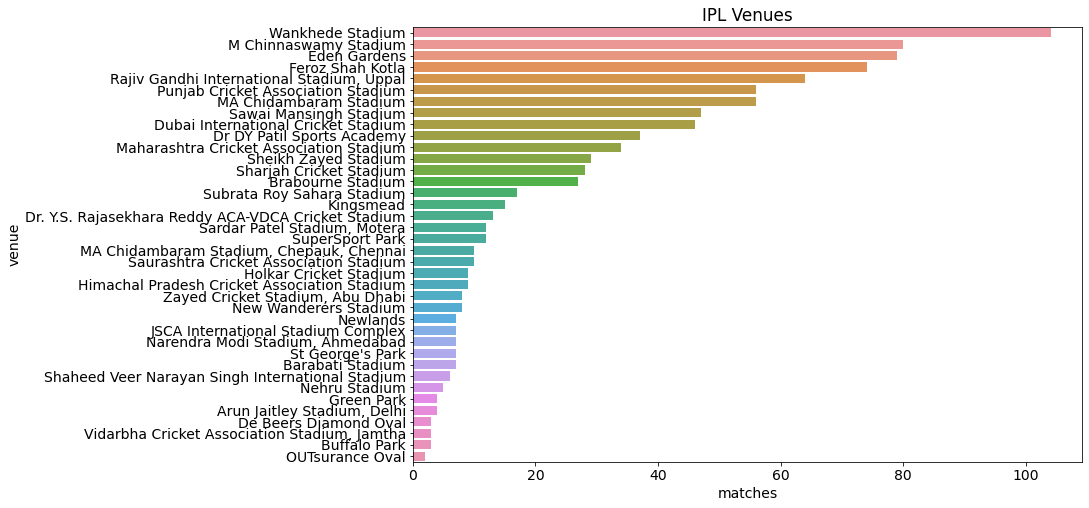

In [9]:
venue_ser = IPL_data['Venue'].value_counts()
venue_df = pd.DataFrame(columns=['venue', 'matches'])
for items in venue_ser.iteritems():
    temp_df = pd.DataFrame({
        'venue':[items[0]],
        'matches':[items[1]]
    })
    venue_df = venue_df.append(temp_df, ignore_index=True)
    
plt.title("IPL Venues")
sns.barplot(x='matches', y='venue', data=venue_df);

In [10]:
venue_df

,venue,matches
0,Wankhede Stadium,104
1,M Chinnaswamy Stadium,80
2,Eden Gardens,79
3,Feroz Shah Kotla,74
4,"Rajiv Gandhi International Stadium, Uppal",64
5,Punjab Cricket Association Stadium,56
6,MA Chidambaram Stadium,56
7,Sawai Mansingh Stadium,47
8,Dubai International Cricket Stadium,46
9,Dr DY Patil Sports Academy,37


### Best Team

In [15]:
team_wins_ser = IPL_data['Winner'].value_counts()

team_wins_df = pd.DataFrame(columns=["team", "wins"])
for items in team_wins_ser.iteritems():
    temp_df1 = pd.DataFrame({
        'team':[items[0]],
        'wins':[items[1]]
    })
    team_wins_df = team_wins_df.append(temp_df1, ignore_index=True)
team_wins_df

,team,wins
0,Mumbai Indians,131
1,Chennai Super Kings,120
2,Kolkata Knight Riders,114
3,Royal Challengers Bangalore,109
4,Sunrisers Hyderabad,104
5,Delhi Capitals,103
6,Punjab Kings,101
7,Rajasthan Royals,96
8,Gujarat Titans,25
9,Pune Warriors,17


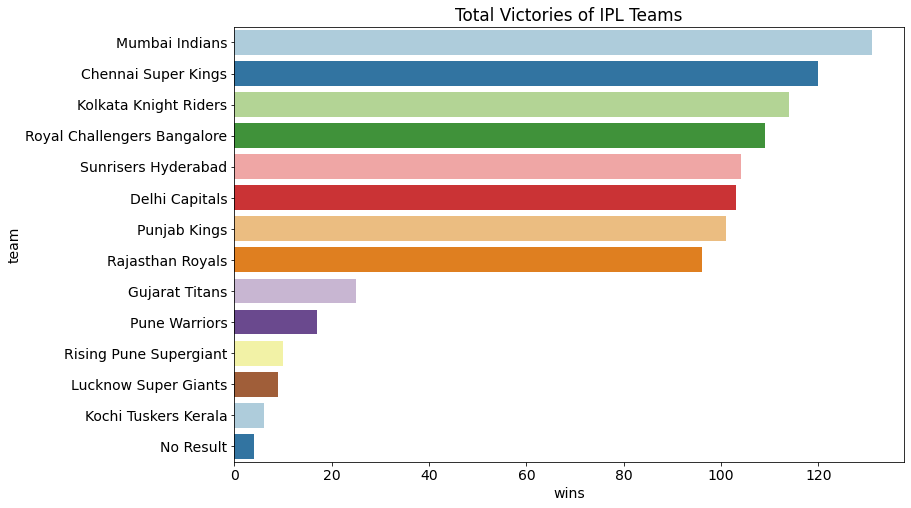

In [16]:
plt.title("Total Victories of IPL Teams")
sns.barplot(x='wins', y='team', data=team_wins_df, palette='Paired');

### MVP

In [19]:
mvp_ser = IPL_data['PlayerOfMatch'].value_counts()

mvp_ten_df = pd.DataFrame(columns=["player", "wins"])
count = 0
for items in mvp_ser.iteritems():
    if count>9:
        break
    else:
        temp_df2 = pd.DataFrame({
            'player':[items[0]],
            'wins':[items[1]]
        })
        mvp_ten_df = mvp_ten_df.append(temp_df2, ignore_index=True)
        count += 1 
mvp_ten_df

,player,wins
0,AB de Villiers,25
1,CH Gayle,22
2,RG Sharma,18
3,DA Warner,18
4,MS Dhoni,17
5,SR Watson,16
6,YK Pathan,16
7,KA Pollard,14
8,SK Raina,14
9,V Kohli,14


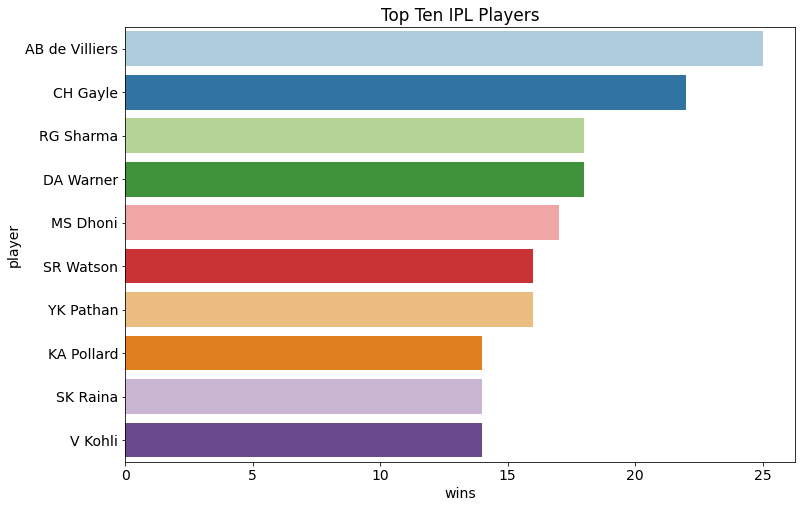

In [20]:
plt.title("Top Ten IPL Players")
sns.barplot(x='wins', y='player', data=mvp_ten_df, palette='Paired');

### Luckiest Team

In [22]:
toss_ser = IPL_data['TossWinner'].value_counts()

toss_df = pd.DataFrame(columns=["team", "wins"])

for items in toss_ser.iteritems():
    temp_df3 = pd.DataFrame({
        'team':[items[0]],
        'wins':[items[1]]
    })
    toss_df = toss_df.append(temp_df3, ignore_index=True) 
toss_df

,team,wins
0,Mumbai Indians,123
1,Sunrisers Hyderabad,117
2,Kolkata Knight Riders,114
3,Chennai Super Kings,109
4,Royal Challengers Bangalore,105
5,Rajasthan Royals,99
6,Punjab Kings,94
7,Delhi Daredevils,80
8,Delhi Capitals,36
9,Pune Warriors,26


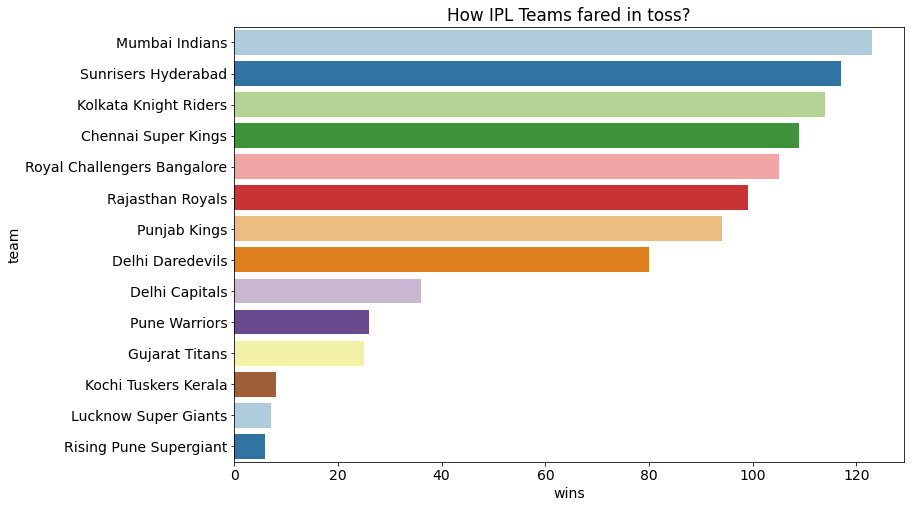

In [23]:
plt.title("How IPL Teams fared in toss?")
sns.barplot(x='wins', y='team', data=toss_df, palette='Paired');